## 1. Import Libraries and Load Dataset File after Preprocessing and Labelling

In [108]:
"""
Meng-import library yang akan dibutuhkan untuk melakukan proses
pemodelan dengan 2 Algoritma Machine Learning: Naive Bayes dan Support Vector Machine (SVM)
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # Library untuk model naive bayes yang dikhususkan untuk memproses data teks
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [109]:
"""
Membaca file dataset setelah dilakukan proses pelabelan dengan 3 nilai label sentimen (positif, negatif dan netral)
dan juga telah dilakukan text processing untuk seluruh data komentar yang berhasil diambil dari video debat
babak pertama hingga kelima capres - cawapres tahun 2024 yang di-upload/ditayangkan melalui 3 channel YouTube yakni
Najwa Shihab, KOMPASTV dan KPU RI
"""
youtube_comments_df = pd.read_excel("Dataset/Text Processing and Labeling Results Dataset.xlsx")

youtube_comments_df.head(9) # Menampilkan 9 data teratas dari variabel DataFrame "youtube_comments_df"

video_id                channel_id                  channel_name  \
0  Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
1  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
2  tEbRB5xxOPI  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
3  tEbRB5xxOPI  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
4  KJdt-HBBGIo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
6  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
7  JFl2fOTBNIE  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
8  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   

                   comment_id                    author  \
0  Ugx6mhUfDOUhd65fWyh4AaABAg          @udinlamidun9716   
1  UgxfMHgX25B2b3jkO4B4AaABAg            @zakishofi3442   
2  UgwTpSK1hjkTNQlcT894AaABAg            @sandigustiana   
3  UgzaWyuIp8PPLQrUOct4AaABAg         @abizardfahry4591   
4  Ugy7bfVbuDxBgae9eVp4AaABAg          @nabilbudiman271   
5  UgzKC1PcDJZk7TvQ_Qh4AaABAg           @UmmuAzizah2010   
6  Ugxtzzc3zKJ8nY3Sg7F4AaABAg            @nursusilo7298   
7  UgwB34PptWoq1w3z7xN4AaABAg  @lilissuryanilimbong7685   
8  Ugypp7MrvLOhoz9GGUV4AaABAg           @abisopiyan8628   

                                  dirty_text_comment  \
0  Siapa yg setuju 3 capres di undang bertiga di ...   
1  Saya bukan pendukung siapapun, tapi terimakasi...   
2  Timestamp<br><br><a href="https://www.youtube....   
3  Siapa yang disini setuju 3 capres dan cawapres...   
4  <a href="https://www.youtube.com/watch?v=KJdt-...   
5  Maa syaa Allaah Pak Anies ❤❤❤❤ <br>Terima kasi...   
6  Tak terbantahkan Pak Anis cards yg paling siap...   
7  Selaku Ibu Rumah Tangga saya tahu apa yg dibut...   
8  Saya dan keluarga berkat debat pertama ini ras...   

                                  clean_text_comment  like_count  total_reply  \
0  tuju capres undang tiga mata najwa debat nyata...        3970          332   
1  dukung terimakasih anies bicara kanjuruhan hre...        3182           91   
2  timestamp href https www youtube com watch teb...        2936          124   
3  tuju capres cawapres undang tiga mata najwa de...        2531           91   
4  href https www youtube com watch kjdt hbbgio a...        1590          122   
5  maa syaa allaah anies terima kasih cerah sbg r...        1542           23   
6  bantah anis cards logis sistematis educativ ko...        1501           91   
7  rumah tangga butuh anak makan gratis solusi ma...        1486          169   
8  keluarga berkat debat pilih anies baswedan pre...        1452           54   

       published_date        updated_date  subjectivity  polarity  \
0 2024-01-07 17:03:53 2024-01-09 23:18:49      0.300000  0.200000   
1 2023-12-12 21:22:08 2023-12-12 21:22:08      0.000000  0.000000   
2 2024-01-21 21:32:13 2024-01-21 21:32:13      0.000000  0.000000   
3 2024-01-22 00:17:18 2024-01-22 00:17:18      0.300000  0.200000   
4 2024-01-07 15:37:05 2024-01-07 15:37:05      0.474444  0.313333   
5 2023-12-12 16:27:52 2023-12-12 16:27:52      0.800000  0.700000   
6 2023-12-12 21:00:05 2023-12-12 21:00:05      1.000000  0.900000   
7 2024-02-04 20:29:41 2024-02-04 20:29:41      0.703611  0.368333   
8 2023-12-12 17:49:04 2023-12-12 17:49:04      0.200000  0.200000   

  sentiment_label  
0         positif  
1          netral  
2          netral  
3         positif  
4         positif  
5         positif  
6         positif  
7         positif  
8         positif

In [110]:
# Menampilkan 13 data terbawah yang dimiliki oleh variabel DataFrame "youtube_comments_df"
youtube_comments_df.tail(13)

video_id                channel_id                  channel_name  \
48226  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48227  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48228  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48229  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48230  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48231  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48232  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48233  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48234  Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48235  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48236  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48237  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48238  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   

                       comment_id                         author  \
48226  Ugzh7xGSMCCt4RLNydJ4AaABAg        @fajarhidayahtullah6793   
48227  UgyOBXqACBGP03Wl7GR4AaABAg                  @osasinantosa   
48228  UgxKUPt3cwr6qX4aU1B4AaABAg                 @ibutigagunung   
48229  UgxYVz0KAMCZo-TzDVV4AaABAg  @annisanoviyantirohmaniar7203   
48230  UgyK38L87xhzd-_WYaZ4AaABAg           @andriassilitonga158   
48231  Ugx27SQkB0QKWZiYTdl4AaABAg                  @parjooka4282   
48232  Ugw7G_RI_lvzFVM8p2d4AaABAg                     @indraJr45   
48233  UgyCvYRSznTa39CjLoB4AaABAg       @ralfinseptyanugroho6478   
48234  UgzZvZaLhvjf9LSH34x4AaABAg                  @bangnizz2474   
48235  UgxPLyFs7wG-gJn77sB4AaABAg           @shintawulansari2633   
48236  UgypnR0aEtVJGiDjHM54AaABAg               @nabillukman7811   
48237  UgwPXrNn6dyKRkgjDzd4AaABAg       @ralfinseptyanugroho6478   
48238  Ugx4nJkrQUve_UheMdp4AaABAg                   @opanboc5038   

                                      dirty_text_comment  \
48226                              Anis jawabannya keren   
48227               buzzer anis mengerikan,banyak banget   
48228  Yg bilang mau berantas korupsi, mau sah kan UU...   
48229                                 Semangat pa ganjar   
48230     Pintar ngolah kata.. blm tentu pintar eksekusi   
48231  Pak prabowo seakan akan jubir jokowi dan gibra...   
48232  Pak ganjar dan pak anies briliant, saya harap ...   
48233                            Jumlah motor nambah bos   
48234  Untuk Mememilih Presiden terbaik Maka dari dul...   
48235  Ganjar mahfud tetap jadi pilihanku semakin pen...   
48236  Kayaknya Pak Prabowo tidak siap debat, visi mi...   
48237                                Si ambil contekan 😂   
48238  Gak ada Keraguan Untuk Pasangan AMIN....Seanda...   

                                      clean_text_comment  like_count  \
48226                                   anis jawab keren           0   
48227                            buzzer anis keri banget           0   
48228  bilang berantas korupsi sah ampas harta korups...           0   
48229                                    semangat ganjar           0   
48230                  pintar ngolah blm pintar eksekusi           0   
48231            prabowo akan jubir jokowi gibran capres           0   
48232  ganjar anies briliant harap head head putar ba...           0   
48233                                   motor nambah bos           0   
48234                            pilih presiden baik kpu           0   
48235  ganjar mahfud pilih penasaran tunggu debat caw...           0   
48236  kayak prabowo debat visi misi nya orasi urut r...           0   
48237                                       ambil contek           0   
48238  gak ragu pasang amin anda milu baya bayar ubah...           0   

       total_reply      published_date        updated_date  subjectivity  \
48226            0 2023-12-13 01:27:30

## 2. Exploratory Dataset after Finished Labelling for Sentiment and Text Processing

In [111]:
# Menampilkan hanya nilai yang ada di dalam masing-masing kolom tetapi kolom tidak diikutsertakan
youtube_comments_df.values

array([['Sbjsg3AFx00', 'UCo8h2TY_uBkAVUIc14m_KCA',
        'Najwa Shihab YouTube Channel', ..., 0.3, 0.2, 'positif'],
       ['gUz_MgdwKg0', 'UCo8h2TY_uBkAVUIc14m_KCA',
        'Najwa Shihab YouTube Channel', ..., 0.0, 0.0, 'netral'],
       ['tEbRB5xxOPI', 'UCo8h2TY_uBkAVUIc14m_KCA',
        'Najwa Shihab YouTube Channel', ..., 0.0, 0.0, 'netral'],
       ...,
       ['gUz_MgdwKg0', 'UCo8h2TY_uBkAVUIc14m_KCA',
        'Najwa Shihab YouTube Channel', ..., 0.9, -0.8, 'negatif'],
       ['gUz_MgdwKg0', 'UCo8h2TY_uBkAVUIc14m_KCA',
        'Najwa Shihab YouTube Channel', ..., 0.0, 0.0, 'netral'],
       ['8J66JxvmEzo', 'UCVdSz86o9q2cQKvAQ5QhOYg',
        'KPU RI YouTube Channel', ..., 0.0, 0.0, 'netral']], dtype=object)

In [112]:
# Menampilkan jumlah baris data dan kolom yang saat ini dimiliki oleh variabel DataFrame "youtube_comments_df"
youtube_comments_df.shape

(48239, 14)

Hasil diatas menunjukkan bahwa saat ini variabel DataFrame "youtube_comments_df" memiliki 14 kolom dan 48.239 baris data. Penambahan jumlah kolom ini terjadi karena sebelumnya telah dilakukan proses penilaian subjektivitas dan polaritas untuk seluruh kalimat komentar serta hasil dari pemrosesan data teks komentar yang telah dilakukan proses removal punctuations, case folding, tokenization, removal stopwords dan stemming.

In [113]:
# Menampilkan nama-nama kolom yang dimiliki oleh variabel DataFrame "youtube_comments_df"
youtube_comments_df.columns

Index(['video_id', 'channel_id', 'channel_name', 'comment_id', 'author',
       'dirty_text_comment', 'clean_text_comment', 'like_count', 'total_reply',
       'published_date', 'updated_date', 'subjectivity', 'polarity',
       'sentiment_label'],
      dtype='object')

Saat ini variabel DataFrame "youtube_comments_df" memiliki 14 kolom diantaranya adalah kolom "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment", "like_count", "total_reply", "published_date", "updated_date", "subjectivity", "polarity", "sentiment_label".

Khusus untuk kolom "clean_text_comment", "subjectivity", "polarity" dan "sentiment_label" adalah kolom yang dibuat saat melakukan proses text processing dan juga pelabelan dengan 3 nilai untuk mengklasifikasikan sentimen berdasarkan nilai/skor yang didapatkan pada kolom "polarity". Sedangkan kolom "subjectivity" merupakan kolom yang menunjukkan suatu kalimat komentar apakah bersifat subjektif atau objektif. Jika skor/nilai pada kalimat komentar memiliki nilai 0 maka dapat dipastikan jika komentar tersebut bersifat objektif sedangkan jika skor pada kalimat komentar memiliki nilai 1 maka komentar tersebut dapat dikategorikan sebagai komentar yang subjektif.

In [114]:
# Menampilkan tipe data yang dimiliki oleh masing-masing kolom dari variabel DataFrame "youtube_comments_df"
youtube_comments_df.dtypes

video_id                      object
channel_id                    object
channel_name                  object
comment_id                    object
author                        object
dirty_text_comment            object
clean_text_comment            object
like_count                     int64
total_reply                    int64
published_date        datetime64[ns]
updated_date          datetime64[ns]
subjectivity                 float64
polarity                     float64
sentiment_label               object
dtype: object

Berdasarkan hasil diatas dapat diketahui jika terdapat penambahan tipe data baru dari sebelumnya yaitu Float dan Datetime karena pada saat proses penggabungan pertama antara seluruh data komentar dari YouTube channel Najwa Shihab, KOMPASTV dan KPU RI, tidak memiliki tipe data Float atau tipe data Datetime. Perlu diketahui dan diingat kembali jika tipe data Float merepresentasikan bilangan angka numerik desimal yaitu sebuah angka pecahan sedangkan tipe data Integer merepresentasikan bilangan bulat yaitu sebuah angka tanpa adanya floating point. Sedangkan tipe data Datetime digunakan untuk merepresentasikan suatu format data yang menunjukkan informasi/keterangan tanggal dan waktu dari suatu kejadian.

Di samping itu, tipe data Object/String merupakan tipe data yang paling banyak dimiliki oleh kolom yang tersimpan di dalam variabel DataFrame "youtube_comments_df". Nama-nama kolom yang memiliki tipe data Object/String dari DataFrame "youtube_comments_df" adalah kolom "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment", dan terakhir adalah kolom "sentiment_label". Sementara itu variabel DataFrame "youtube_comments_df" juga memiliki tipe data Datetime yang berfungsi sebagai representasi kolom yang menunjukkan stempel tanggal dan waktu seperti tanggal dan waktu pembelian suatu barang, tanggal dan waktu saat teks komentar dibuat oleh para penonton konten video di media sosial YouTube, dll.

In [115]:
"""
Menampilkan masing-masing kolom data dari variabel DataFrame
"youtube_comments_df" yang memiliki tipe data selain Object/String
"""
youtube_comments_df.select_dtypes(exclude="O")

like_count  total_reply      published_date        updated_date  \
0            3970          332 2024-01-07 17:03:53 2024-01-09 23:18:49   
1            3182           91 2023-12-12 21:22:08 2023-12-12 21:22:08   
2            2936          124 2024-01-21 21:32:13 2024-01-21 21:32:13   
3            2531           91 2024-01-22 00:17:18 2024-01-22 00:17:18   
4            1590          122 2024-01-07 15:37:05 2024-01-07 15:37:05   
...           ...          ...                 ...                 ...   
48234           0            0 2024-01-07 19:08:29 2024-01-07 19:08:29   
48235           0            0 2023-12-13 01:31:02 2023-12-13 01:31:02   
48236           0            0 2023-12-13 01:31:42 2023-12-13 01:31:42   
48237           0            0 2023-12-13 01:31:45 2023-12-13 01:31:45   
48238           0            0 2024-02-04 18:22:22 2024-02-04 18:22:22   

       subjectivity  polarity  
0          0.300000  0.200000  
1          0.000000  0.000000  
2          0.000000  0.000000  
3          0.300000  0.200000  
4          0.474444  0.313333  
...             ...       ...  
48234      0.000000  0.000000  
48235      0.000000 -0.100000  
48236      0.900000 -0.800000  
48237      0.000000  0.000000  
48238      0.000000  0.000000  

[48239 rows x 6 columns]

In [116]:
"""
Menampilka kolom data dari variabel DataFrame
"youtube_comments_df" yang hanya memiliki tipe data datetime
"""
youtube_comments_df.select_dtypes(include="datetime")

published_date        updated_date
0     2024-01-07 17:03:53 2024-01-09 23:18:49
1     2023-12-12 21:22:08 2023-12-12 21:22:08
2     2024-01-21 21:32:13 2024-01-21 21:32:13
3     2024-01-22 00:17:18 2024-01-22 00:17:18
4     2024-01-07 15:37:05 2024-01-07 15:37:05
...                   ...                 ...
48234 2024-01-07 19:08:29 2024-01-07 19:08:29
48235 2023-12-13 01:31:02 2023-12-13 01:31:02
48236 2023-12-13 01:31:42 2023-12-13 01:31:42
48237 2023-12-13 01:31:45 2023-12-13 01:31:45
48238 2024-02-04 18:22:22 2024-02-04 18:22:22

[48239 rows x 2 columns]

In [117]:
"""
Menampilkan nilai-nilai statistik deskriptif yang dimiliki oleh beberapa
kolom dengan nilai data numerik (bertipe data Integer/Float) pada variabel DataFrame "youtube_comments_df"
"""
youtube_comments_df.describe()

like_count   total_reply  subjectivity      polarity
count  48239.000000  48239.000000  48239.000000  48239.000000
mean       5.624453      0.474968      0.079868      0.105707
std       47.191377      3.682588      0.212832      0.274946
min        0.000000      0.000000      0.000000     -1.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        1.000000      0.000000      0.000000      0.216667
max     3970.000000    332.000000      1.000000      1.000000

Berdasarkan hasil diatas dapat diketahui nilai-nilai statistik dari keempat kolom yang memiliki format nilai data numerik dari variabel DataFrame "youtube_comments_df" yaitu kolom "like_count", "total_reply", "subjectivity" dan "polarity". Sedangkan kolom-kolom seperti "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment", "published_date", "updated_date" dan "sentiment_label" memiliki format nilai data bukan numerik. Bahkan khusus untuk kolom "published_date" dan "updated_date" memiliki format data tanggal dan waktu karena menunjukkan tanggal dan waktu dari pengiriman setiap kalimat komentar yang dibuat oleh para penonton video debat capres - cawapres tahun 2024.


Alasan kenapa keempat kolom tersebut terlihat nilai statistik deskriptifnya sedangkan kolom "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment", "published_date", "updated_date" dan "sentiment_label" tidak ada dikarenakan kesepuluh kolom tersebut memiliki format nilai data kategorikal dengan tipe data string (kecuali kolom "published_date" dan "updated_date" yang merupakan data yang memiliki format Datetime). Sehingga dengan output diatas yang menunjukkan nilai-nilai statistik deskriptif, kita dapat mengetahui bahwasanya nilai count, mean (rata-rata), std (standar deviasi), min (minimum), 25% yang merupakan nilai quartil pertama, 50% yang menunjukkan sebuah nilai quartil kedua atau juga dapat dikategorikan sebagai nilai median, 75% yang merupakan nilai quartil ketiga dan nilai max (maximum) merupakan nilai statistik deskriptif untuk nilai data numerik yang memiliki tipe data Integer/Float. Jika kita ingin melihat sekaligus menampilkan nilai-nilai statistik deskriptif untuk kolom yang memiliki format nilai data kategorikal, kita dapat menggunakan 2 cara yang paling umum digunakan menggunakan library Pandas yaitu sebagai berikut:

- Cara pertama adalah dengan cara "nama variabel DataFrame.describe(include="O")". Nilai "O" pada parameter include di dalam fungsi .describe() merepresentasikan Object yaitu tipe data String untuk setiap nilai data yang memiliki format nilai kategorikal

- Cara kedua yaitu dapat menggunakan "nama variabel DataFrame.describe(include="all")". Namun jika menggunakan cara kedua maka seluruh kolom yang terdapat di dalam variabel DataFrame akan menampilkan nilai statistik deskriptifnya masing-masing yang disesuaikan dengan format nilai datanya.

Untuk mengetahui informasi yang terdapat pada output diatas yang menampilkan nilai statistik deskriptif untuk seluruh nilai data bertipe data numerik, berikut adalah informasi-informasi dan insight yang dapat diambil dari kolom "polarity" dan kolom "like_count" yang memiliki format nilai data numerik dengan tipe data Float dan Integer:

1. Kolom "polarity" memiliki nilai minimum yakni -1.0 dengan nilai quartil pertama dan kedua adalah 0.0. Hal ini cukup selaras dengan hasil pelabelan dimana untuk membuat label sentimen, setiap nilai dibawah angka 0 (angka minus) akan memiliki label Negatif. Selain itu nilai maksimum/nilai terbesar pada kolom "polarity" adalah angka 1.0. Sama seperti logika untuk angka  -1.0, setiap nilai angka polaritas yang melebihi angka 0, maka akan memiliki label sentimen Positif sehingga nilai terbesar yang dimiliki oleh kolom ini adalah nilai 1.0. Sedangkan nilai rata-rata pada kolom ini adalah 0.1 dengan standar deviasi adalah 0.3 dari angka 0.274946.

2. Kolom "like_count" memiliki nilai minimum yakni 0. Hal ini mengartikan jika tidak semua kalimat komentar yang terdapat pada masing-masing video debat capres - cawapres yang ditayangkan oleh channel YouTube Najwa Shihab, KOMPASTV dan KPU RI disetujui/disukai oleh para user atau akun YouTube yang menonton debat secara live streaming maupun rekaman. Di samping itu terdapat insight dimana nilai maksimum yang dimiliki oleh kolom "like_count" adalah 3.970. Hal ini menjelaskan bahwasanya terdapat kalimat komentar yang sangat disukai dan disetujui oleh beberapa akun/channel YouTube yang melihat teks komentar tersebut. Komentar yang memiliki jumlah disukai sebanyak 3.970 dibuat oleh akun/channel YouTube bernama @udinlamidun9716 membuat kalimat komentar seperti, "Siapa yg setuju 3 capres di undang bertiga di mata najwa untuk berdebat secara nyata dan menjawab dengan cukup waktu?? Perdebatan disini yg terlihat menonjol hanya pak anies saja soalnya.<br>MATA NAJWA, TOLONG BANTU AGAR KE 3 CAPRES BISA HADIR. AGAR KITA SEMUA BISA MELIHAT APAKAH PRABOWO BISA MENJAWAB KETIKA DI BERI WAKTU YG CUKUP?? JANGAN PAS DI DEBAT KPU NANGIS, TAPI PAS DI KANDANG MALAH TERIAK NGATA NGATAIN ANIES". Isi komentar tersebut dapat diketahui dan dilihat pada kolom "dirty_text_comment".

In [118]:
# Menampilkan nilai statistik deskriptif untuk kolom-kolom dengan tipe data String/Object
youtube_comments_df.describe(include="O")

video_id                channel_id                  channel_name  \
count         48239                     48239                         48239   
unique           15                         3                             3   
top     zB0RvKAc2kw  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
freq          10500                     22999                         22999   

                        comment_id                 author  \
count                        48239                  48239   
unique                       48239                  36170   
top     Ugx6mhUfDOUhd65fWyh4AaABAg  @trianitarahmawati664   
freq                             1                     58   

                                      dirty_text_comment clean_text_comment  \
count                                              48239              47036   
unique                                             45662              41922   
top     GASPOLL BRO! PRABOWO GIBRAN UNTUK INDONESIA MAJU               amin   
freq                                                 177                403   

       sentiment_label  
count            48239  
unique               3  
top             netral  
freq             24587

Hasil diatas menunjukkan nilai-nilai statistik deskriptif untuk kolom-kolom yang memiliki tipe data String/Object. Tipe data String merupakan sebuah tipe data yang merepresentasikan nilai data berformat kategorikal yaitu sebuah data yang terdiri dari serangkaian huruf yang membentuk sebuah kata/kalimat, karakter spesial, simbol-simbol tanpa adanya angka. Di samping itu, nilai statistik desktriptif untuk kolom yang memiliki tipe data String/Object sangat berbeda dengan nilai statistik deskriptif untuk kolom yang memiliki nilai numerik seperti tipe data Integer dengan angka bilangan bulat dan tipe data Float dengan angka bilangan desimal. Jika pada nilai statistik deskriptif untuk kolom yang memiliki nilai data numerik/angka maka statistik deskriptifnya adalah nilai mean/rata-rata, standar deviasi, minimum, maksimum, quartil pertama (25%), quartil kedua atau yang biasa dikenal sebagai nilai median (50%) dan quartil ketiga (75%). Sedangkan nilai statistik deskriptif untuk kolom yang memiliki nilai data kategorikal adalah nilai unique, top dan freq atau frekuensi dari kemunculan data.

Nilai unique pada statistik deskriptif untuk kolom bertipe data String merupakan sebuah nilai yang memiliki keunikan tersendiri dan keunikan tersebut yang membuat satu data dengan data lainnya tidak sama. Sebagai contoh nilai unik yang dapat diketahui berdasarkan output diatas adalah kolom "channel_id" dan "channel_name" yang hanya memiliki 3 nilai saja yaitu Najwa Shihab YouTube Channel, KOMPAS TV YouTube Channel dan KPU RI YouTube Channel. Sedangkan kolom "channel_id" merupakan sebuah ID yang dimiliki oleh masing-masing tiga channel YouTube yaitu YouTube channel Najwa Shihab dengan ID-nya yaitu UCo8h2TY_uBkAVUIc14m_KCA, KOMPASTV yang memiliki ID channel yaitu UC5BMIWZe9isJXLZZWPWvBlg dan YouTube channel KPU RI dengan ID-nya adalah UCVdSz86o9q2cQKvAQ5QhOYg).


Nilai statistik deskriptif selanjutnya yang terdapat pada kolom bertipe data String/Object adalah nilai statistik top yang menunjukkan/merepresentasikan suatu nilai data yang paling banyak muncul di dalam kolom suatu kolom sehingga nilai tersebut paling menonjol diantara nilai-nilai data yang lainnya yang juga terdapat di kolom tersebut. Sebagai contoh nilai statistik top pada kolom "channel_name" adalah Najwa Shihab YouTube Channel karena nilai tersebut memiliki jumlah frekuensi kemunculan sebanyak 22.999 kali atau dapat diartikan jika nilai Najwa Shihab YouTube Channel merupakan nilai data yang paling sering terlihat di dalam kolom "channel_name". Untuk menampilkan jumlah frekuensi terbanyak di dalam suatu data yang dimiliki oleh kolom di dalam DataFrame, kita dapat menggunakan fungsi "DataFrame_Name.value_counts()".

Maka dari itu berlanjut kepada nilai statistik deskriptif selanjutnya yaitu nilai statistik freq yang merupakan jumlah total kemunculan/frekuensi suatu nilai data di dalam kolom. Nilai freq pada statistik deskriptif juga menunjukkan data tersebutlah yang paling sering muncul di dalam suatu kolom. Contoh lainnya adalah pada kolom "author", nilai statistik top di kolom "author" adalah username/akun channel YouTube bernama @trianitarahmawati664 yang memiliki jumlah kemunculan data terbanyak yaitu 58 kali di dalam variabel DataFrame "youtube_comments_df". Hal tersebut juga dapat mengartikan jika username @trianitarahmawati664 adalah username/akun yang paling sering membuat komentar di dalam video debat capres - cawapres tahun 2024 (setidaknya pada tiga channel YouTube yang berbeda dan keterbatasan dalam jumlah pengambilan nilai data dari masing-masing video debat).

In [119]:
# Menampilkan jumlah data unik yang terdapat pada masing-masing kolom di dalam variabel DataFrame "youtube_comments_df"
youtube_comments_df.nunique()

video_id                 15
channel_id                3
channel_name              3
comment_id            48239
author                36170
dirty_text_comment    45662
clean_text_comment    41922
like_count              381
total_reply              77
published_date        46573
updated_date          46579
subjectivity            828
polarity               2310
sentiment_label           3
dtype: int64

Hasil diatas menunjukkan jumlah keunikan data yang dimiliki oleh masing-masing kolom. Keunikan data merupakan suatu nilai data yang memiliki perbedaan antara satu nilai dengan nilai lainnya. Sebagai contoh pada kolom "sentiment_label" memiliki 3 data unik yaitu nilai sentiment positif, netral dan negatif. Kolom yang memiliki 3 nilai unik tidak hanya dimiliki oleh kolom "sentiment_label" karena kolom "channel_id" dan "channel_name" juga memiliki jumlah data unik yang sama yaitu 3 di mana nilai UCo8h2TY_uBkAVUIc14m_KCA yang merupakan ID dari channel YouTube Najwa Shihab, UCVdSz86o9q2cQKvAQ5QhOYg yang merupakan ID dari channel YouTube KPU RI dan terakhir adalah ID UC5BMIWZe9isJXLZZWPWvBlg dari YouTube channel KOMPASTV.

Di samping itu, kita juga dapat mengambil kesimpulan bahwasanya setiap teks komentar yang dibuat oleh masing-masing akun channel yang juga ikut menonton dan berkomentar di dalam tayangan video debat capres - cawapres tahun 2024 di channel YouTube Najwa Shihab, KOMPASTV dan KPU RI akan memiliki ID komentar yang berbeda-beda walaupun kalimat komentar yang dibuat adalah sama. Hal ini dapat diketahui sebab jumlah keunikan nilai data dari kolom "dirty_text_comment" (sebelum seluruh teks komentar diproses dengan Algoritma NLP) adalah 45.662 sedangkan jumlah nilai unik pada kolom "comment_id" adalah 48.239 data atau sama dengan jumlah baris data yang terdapat di dalam variabel DataFrame "youtube_comments_df". Informasi ini mengartikan walaupun terdapat teks komentar yang ditulis dengan isi dan susunan kata dan kalimat yang sama tetapi tetap akan memiliki ID yang berbeda. Hal ini juga selaras dengan prinsip ID secara general bahwa ID merupakan identitas unik dan harus berbeda antara satu nilai dengan nilai data lainnya walaupun nilai data tersebut adalah sama.

Eksplorasi selanjutnya adalah saya akan menampilkan jumlah frekuensi/kemunculan suatu nilai data khususnya kolom data yang memiliki tipe data String (data yang dibuat menggunakan format kategorikal).

In [120]:
# Menampilkan jumlah frekuensi/kemunculan suatu nilai data di dalam beberapa kolom dari variabel DataFrame "youtube_comments_df"
print("Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom ID dari Ketiga YouTube Channel:")
print(youtube_comments_df["channel_id"].value_counts(), "\n")

print("Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Nama YouTube Channel:")
print(youtube_comments_df["channel_name"].value_counts(), "\n")

print("Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Author \n"
      "(Channel YouTube yang ikut Berkomentar di dalam Video Tayangan Debat):")
print(youtube_comments_df["author"].value_counts(), "\n")

print("Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Teks Komentar yang Sudah Diproses dengan NLTK:")
print(youtube_comments_df["clean_text_comment"].value_counts(), "\n")

print("Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Label Sentimen:")
print(youtube_comments_df["sentiment_label"].value_counts())

Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom ID dari Ketiga YouTube Channel:
UCo8h2TY_uBkAVUIc14m_KCA    22999
UCVdSz86o9q2cQKvAQ5QhOYg    12740
UC5BMIWZe9isJXLZZWPWvBlg    12500
Name: channel_id, dtype: int64 

Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Nama YouTube Channel:
Najwa Shihab YouTube Channel    22999
KPU RI YouTube Channel          12740
KOMPAS TV YouTube Channel       12500
Name: channel_name, dtype: int64 

Jumlah Frekuensi/Kemunculan Data Terbanyak pada Kolom Author 
(Channel YouTube yang ikut Berkomentar di dalam Video Tayangan Debat):
@trianitarahmawati664        58
@rinideh6414                 56
@lasmiminah7171              52
@rzkadity69                  49
@dinarikaanggidesylia1408    49
                             ..
@sileasvirgil8393             1
@NadiraArsyilaTV              1
@yances6948                   1
@febriaprizal2517             1
@opanboc5038                  1
Name: author, Length: 36170, dtype: int64 

Jumlah Frekuensi/Kemuncul

Seperti yang sudah diinformasikan sebelumnya bahwasanya pada kolom "channel_id" dan "channel_name" memiliki 3 data unik yang merupakan sumber/channel/tempat dimana data-data komentar diambil menggunakan YouTube Data API v3 dari Google Cloud Platform Console berdasarkan topik utama dalam penelitian kali ini yaitu debat Calon Presiden -  Calon Wakil Presiden Republik Indonesia tahun 2024 yang ditayangkan oleh channel Najwa Shihab, KOMPASTV dan KPU RI. Channel Najwa Shihab memiliki ID channel YouTube yaitu UCo8h2TY_uBkAVUIc14m_KCA, channel YouTube KOMPASTV memiliki ID channel UCVdSz86o9q2cQKvAQ5QhOYg dan terakhir adalah channel KPU RI yang memiliki ID channel yaitu UC5BMIWZe9isJXLZZWPWvBlg. Channel Najwa Shihab dengan ID channel yakni UCo8h2TY_uBkAVUIc14m_KCA memiliki jumlah frekuensi/kemunculan nilai sebanyak 22.999 data di dalam masing-masing kedua kolom tersebut yaitu kolom "channel_id" dan "channel_name". Kemudian channel KPU RI dengan ID channel yakni UC5BMIWZe9isJXLZZWPWvBlg memiliki frekuensi kemunculan nilai data sebanyak 12.740 kali di kedua kolom tersebut. Terakhir adalah channel KOMPASTV dengan ID channel UCVdSz86o9q2cQKvAQ5QhOYg yang memiliki jumlah kemunculan nilai data sebanyak 12.500, baik di dalam kolom "channel_id" dan kolom "channel_name".

Insight selanjutnya yang dapat kita ambil berdasarkan output mengenai jumlah frekuensi/kemunculan data dari beberapa kolom adalah ternyata nilai netral pada kolom "sentiment_label" merupakan nilai yang paling banyak muncul di dalam kolom "sentiment_label". Jumlah kemunculan nilai netral pada kolom "sentiment_label" adalah 24.587 kali sedangkan nilai positif hanya 18.178 kali dan nilai negatif sebanyak 5.474 kali. Untuk sementara dari insight ini kita asumsikan bahwasanya mayoritas akun yang berkomentar di dalam video tayangan debat capres - cawapres tahun 2024 yang dikumpulkan dari tiga channel YouTube politik seperti Najwa Shihab, KOMPASTV dan KPU RI memiliki pendapat dan pilihan yang netral jika melihat dari susunan kalimat komentar yang telah dibersihkan dan diproses menggunakan metode Natural Language Processing (NLP).

In [121]:
# Menampilkan jumlah data yang terduplikasi pada variabel DataFrame "youtube_comments_df"
print("Jumlah Data Duplikat pada Variabel DataFrame 'youtube_comments_df' adalah:", youtube_comments_df.duplicated().sum())

Jumlah Data Duplikat pada Variabel DataFrame 'youtube_comments_df' adalah: 0


Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame tidak memiliki data duplikat di dalamnya. Perlu diketahui dan diingat kembali bahwasanya data duplikat merupakan sebuah pola data yang memiliki kesamaan nilai dalam baris yang berbeda sehingga jika salah satu data dihapus/dihilangkan dalam suatu tabel maka data tersebut tidak akan sepenuhnya hilang. Tetapi walaupun begitu dalam penelitian data science tidak mengizinkan adanya duplikasi data atau redudansi data sehingga jika terdapat data duplikat maka data tersebut harus dihilangkan dari baris data supaya tidak menghasilkan analisis yang bias.

In [122]:
# Menampilkan jumlah nilai data yang hilang dari masing-masing kolom pada variabel DataFrame "youtube_comments_df"
youtube_comments_df.isnull().sum()

video_id                 0
channel_id               0
channel_name             0
comment_id               0
author                   0
dirty_text_comment       0
clean_text_comment    1203
like_count               0
total_reply              0
published_date           0
updated_date             0
subjectivity             0
polarity                 0
sentiment_label          0
dtype: int64

Berdasarkan hasil output diatas menunjukkan jika pada kolom "clean_text_comment" memiliki 1.203 baris data yang tidak memiliki nilai sehingga baris-baris tersebut diidentifikasi sebagai nilai NaN atau Not a Number. Pada tahapan sebelumnya, penelitian ini telah berhasil mengubah kolom "author" dan kolom "channel_url" yang sebelumnya memiliki nilai NaN menjadi nilai String yaitu Unknown. Namun khusus untuk mengatasi nilai NaN yang terdapat pada kolom "clean_text_comment", penelitian ini akan menghapus 1.203 data yang memiliki nilai NaN di dalamnya.

Asumsi saya kenapa terdapat 1.203 adalah karena kolom "clean_text_comment" merupakan sebuah kolom yang menyimpan kalimat-kalimat komentar yang telah dilakukan proses text processing seperti tokenization, stemming, stopwords removal, removal punctuations dan stemming dan mungkin saja 1.203 komentar tersebut sebelumnya ditulis dengan komentar yang mengandung unsur angka, emoticon dan kata-kata yang termasuk ke dalam list stopwords removal sehingga secara otomatis akan terhapus. Perlu diketahui dan diingat kembali bahwa stopwords removal di dalam tahapan text processing bertujuan untuk menghilangkan/menghapus kata yang tidak memiliki makna dan arti menurut Bahasa Indonesia yang dibuat di dalam modul NLTK.Corpus dengan fungsi stopwords. Sedangkan removal punctuation merupakan tahapan di dalam text processing yang bertujuan untuk membersihkan susunan kalimat dari berbagai macam simbol-simbol, karakter spesial maupun emoticon.

Maka dari itu saya akan menampilkan 25 baris data NaN yang terdapat di dalam kolom "clean_text_comment" pada variabel DataFrame "youtube_comments_df".

In [123]:
"""
Menampilkan 25 baris data yang memiliki nilai NaN pada
kolom "clean_text_comment" dari variabel DataFrame "youtube_comments_df"
"""
youtube_comments_df_null_rows = youtube_comments_df.isnull().any(axis = 1)
null_rows = youtube_comments_df[youtube_comments_df_null_rows]

null_rows.head(25)

video_id                channel_id                  channel_name  \
2083  yNO0YS846kU  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
2394  tEbRB5xxOPI  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
2428  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
2916  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
2939  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
3365  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
3668  yNO0YS846kU  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
3985  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4072  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4365  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4366  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4407  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4485  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4488  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4505  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
4757  JFl2fOTBNIE  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
4972  JFl2fOTBNIE  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
5026  tEbRB5xxOPI  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
5476  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5479  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5485  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5598  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5601  YzC828FYrwM  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5829  Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
6084  JFl2fOTBNIE  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   

                      comment_id                        author  \
2083  UgwAl-TcRXbfPGh-6d54AaABAg                @siapakah_saya   
2394  UgwcvlwzFm9WwBDcoFN4AaABAg                  @FerryKur666   
2428  UgwzkqWxAeXqc3agLVJ4AaABAg              @L.Am.AnRony1002   
2916  UgwDg_vJ4gldo1gy_HR4AaABAg                @theleggend925   
2939  UgzVsY1W2uZTinSCdFt4AaABAg       @dewiekaprawitarani3700   
3365  UgxoXIs_cj6qWgNTkHt4AaABAg              @user-it7ji7us2r   
3668  Ugw3qwBZFqQftp07Twd4AaABAg                @tiamonica6322   
3985  UgywljMrhhrv7IU-eEN4AaABAg             @desaguyangan4910   
4072  UgzjpRvb5zESsicwGBl4AaABAg              @user-md8lq9xu8l   
4365  UgwbWuOu5SPzepfFMI54AaABAg                 @evanhady4831   
4366  UgziEZy5fmLY0tv6lC94AaABAg                 @makealfa4383   
4407  Ugxpwk8MiF-0GS9VZId4AaABAg                    @GassDetri   
4485  UgzTrOnOmlVJI-deNGJ4AaABAg                  @suebebs6791   
4488  UgwsD5_lQNVd2iOOhcl4AaABAg  @jaringanbintangindonesia786   
4505  UgzB5V2Qa0o_hry4lmJ4AaABAg                 @mustaram7282   
4757  UgxxNGIdTPJuhfLwpQ14AaABAg             @dendievygeboy348   
4972  UgwD0SkKg10wDZBRIkt4AaABAg                @SMProjectNews   
5026  UgzpLiSiQIhkkFIHZUB4AaABAg                     @ED-bb8rk   
5476  Ugy-GJgOzhgSimV26Y14AaABAg             @sutarnogayoh5482   
5479  Ugz0RTbNFWHXz0_T2BB4AaABAg              @dahliazahra8067   
5485  UgwwvLwb9xhCskj6ZF94AaABAg              @user-nv7qv6zk5k   
5598  UgxLGelZvcZ0m5eykjp4AaABAg              @nursitisiti3522   
5601  UgzK-aCbmagcc_boV554AaABAg               @afrizalspd5457   
5829  Ugy2z-aOJAeKf5HRvhV4AaABAg               @MuhamadHarisma   
6084  UgxaDzOKtyC37gQW2pZ4AaABAg                @irma_erviana7   

                   dirty_text_comment clean_text_comment  like_count  \
2083                                0                NaN          19   
2394        Makin Yakin Sama Pak 03 ❤                NaN          15   
2428                             ✌️✌️                NaN          15   
2

Hasil diatas menunjukkan jika nilai NaN yang menjadi representasi missing value pada kolom "clean_text_comment" sebelumnya merupakan komentar yang dibuat menggunakan emoticon, angka atau kata-kata yang termasuk ke dalam list stopwords removal. Hal tersebut bisa dilihat pada indeks data ke-2916 pada kolom "dirty_text_comment", komentar yang dibuat oleh akun channel Youtube bernama @theleggend925 dibuat menggunakan emoticon sebagai bentuk dukungannya kepada pasangan paslon nomor urut 2. Karena emoticon termasuk ke dalam removal punctuations yang telah didefinisikan pada fungsi cleansing_text, maka komentar tersebut otomatis akan terhapus pada indeks data ke-2916 sehingga yang tersimpan di dalam kolom "clean_text_comment" adalah nilai NaN sebagai format jika tidak ada nilai data.

Maka dari itu pada penelitian kali ini saya akan menghapus setiap baris/indeks data yang memiliki nilai NaN (Not a Number) sehingga nantinya jumlah data yang akan dimiliki oleh variabel DataFrame "youtube_comments_df" akan berkurang karena tidak adanya indeks data dengan nilai NaN/missing value seperti pada indeks data ke-2916.

In [124]:
"""
Menghapus missing values (nilai yang hilang) dari beberapa indeks/baris
data yang terdapat di dalam kolom "clean_text_comment" yang direpresentasikan sebagai NaN (Not a Number)
"""
youtube_comments_df.dropna(axis=0, inplace=True)

# Menampilkan sekaligus mengecek jumlah missing values di masing-masing kolom dari variabel DataFrame "youtube_comments_df"
youtube_comments_df.isnull().sum()

video_id              0
channel_id            0
channel_name          0
comment_id            0
author                0
dirty_text_comment    0
clean_text_comment    0
like_count            0
total_reply           0
published_date        0
updated_date          0
subjectivity          0
polarity              0
sentiment_label       0
dtype: int64

Hasil output diatas telah menunjukkan bahwa 1.203 data NaN yang sebelumnya dimiliki oleh kolom "clean_text_comment" telah berhasil dihapus dari indeks data dari variabel DataFrame "youtube_comments_df". Hasil ini sudah pasti akan mengurangi jumlah baris data secara keseluruhan yang sebelumnya dimiliki oleh DataFrame "youtube_comments_df" berjumlah sebanyak 48.239 data menjadi 47.036 baris data.

In [125]:
"""
Menampilkan jumlah total data dan kolom yang saat ini dimiliki oleh variabel DataFrame
"youtube_comments_df" setelah missing value/NaN pada kolom "clean_text_comment" berhasil dihilangkan
"""
youtube_comments_df.shape

(47036, 14)

In [126]:
"""
Menampilkan beberapa informasi yang dimiliki oleh variabel DataFrame "youtube_comments_df"
seperti tipe data dari masing-masing kolom, jumlah baris data atau kolom yang dimiliki oleh variabel DataFrame,
nama-nama kolom yang dimiliki oleh DataFrame dan apakah masing-masing kolom masing terdapat missing value/tidak
"""
youtube_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47036 entries, 0 to 48238
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   video_id            47036 non-null  object        
 1   channel_id          47036 non-null  object        
 2   channel_name        47036 non-null  object        
 3   comment_id          47036 non-null  object        
 4   author              47036 non-null  object        
 5   dirty_text_comment  47036 non-null  object        
 6   clean_text_comment  47036 non-null  object        
 7   like_count          47036 non-null  int64         
 8   total_reply         47036 non-null  int64         
 9   published_date      47036 non-null  datetime64[ns]
 10  updated_date        47036 non-null  datetime64[ns]
 11  subjectivity        47036 non-null  float64       
 12  polarity            47036 non-null  float64       
 13  sentiment_label     47036 non-null  object    

Berdasarkan output yang didapatkan dari fungsi "info()" diatas yang menunjukkan beberapa informasi dasar yang terdapat di dalam DataFrame "youtube_comments_df", kita dapat mengetahui beberapa poin informasi dari DataFrame tersebut diantaranya adalah sebagai berikut:

1. Variabel DataFrame "youtube_comments_df" merupakan sebuah objek yang bersifat sebuah tabel tabular yang di dalamnya terdapat susunan kolom, baris/row dan cell yang disebut sebagai DataFrame. DataFrame "youtube_comments_df" merupakan sebuah data yang tersimpan dengan format tabular dari hasil proses penggabungan beberapa data-data komentar yang didapatkan dari video YouTube tentang debat calon Presiden - Wakil Presiden Republik Indonesia tahun 2024 babak pertama hingga babak kelima yang ditayangkan oleh channel YouTube Najwa Shihab, KOMPASTV dan KPU RI.

2. Variabel DataFrame "youtube_comments_df" saat ini memiliki jumlah data/baris sebanyak 47.036 data yang terdiri dari kalimat-kalimat komentar yang dibuat dan dikirimkan oleh para channel akun yang menonton siaran debat, nama channel akun yang berkomentar, tanggal dan waktu dari komentar tersebut dibuat, dll. Sebelumnya variabel DataFrame "youtube_comments_df" memiliki jumlah data sebanyak 48.239 namun karena 1.203 data yang terdapat di dalam kolom "clean_text_comment" merupakan nilai NaN alias baris data yang tidak memiliki nilai, maka seluruh nilai NaN yang terdapat di dalam kolom "clean_text_comment" dihilangkan dari daftar baris data/indeks pada DataFrame "youtube_comments_df".

3. Saat ini variabel DataFrame "youtube_comments_df" memiliki 14 kolom yang diantaranya adalah kolom "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment", "like_count", "total_reply", "published_date", "updated_date", "subjectivity", "polarity", dan terakhir adalah kolom "sentiment_label".

4. Masing-masing kolom yang ada di dalam variabel DataFrame "youtube_comments_df" sudah tidak memiliki nilai NaN (Not a Number) atau nilai yang hilang (missing value) sehingga dapat disimpulkan bahwa 14 kolom yang dimiliki oleh variabel DataFrame "youtube_comments_df" dan setiap baris indeksnya data yang dimiliki oleh 14 kolom, saat ini sudah tidak ada satupun baris data pada indeks yang tidak memiliki nilai/data dengan representasi NaN seperti pada variabel null_rows yang masih memiliki missing value di dalam kolom "clean_text_comment".

5. Pada variabel DataFrame "youtube_comments_df" memiliki 4 jenis tipe data yang berbeda. Tipe data yang pertama adalah tipe data Integer untuk setiap kolom yang memiliki nilai data bersifat yang angka atau numerik. Data numerik/data angka dibedakan menjadi 2 jenis bilangan angka yaitu bilangan bulat dan bilangan desimal. Angka bilangan bulat direpresentasikan sebagai tipe data Integer dan angka bilangan desimal direpresentasikan sebagai tipe data Float. Karena pada DataFrame "youtube_comments_df" hanya memiliki 2 kolom saja yang bertipe data Integer, yaitu kolom "like_count" dan "total_reply", di mana kedua kolom tersebut memiliki nilai angka bilangan bulat, maka kolom tersebut bertipe data Integer bukan Float. Tipe data yang kedua adalah tipe data Datetime dan hanya 2 kolom saja yang memiliki tipe data Datetime yaitu kolom "published_date" dan "updated_date". Tipe data yang ketiga yang dimiliki oleh variabel DataFrame "youtube_comments_df" adalah tipe data Object/String. Tipe data Object/String adalah representasi dari nilai-nilai data yang dibuat dengan susunan kata dan kalimat, simbol-simbol maupun karakter spesial yang dimiliki oleh suatu kolom di dalam DataFrame. Tipe data terakhir yang terdapat di dalam variabel DataFrame "youtube_comments_df" adalah tipe data Float dan hanya 2 kolom yang memiliki tipe data Float yaitu kolom "subjectivity" dan kolom "polarity". Secara jumlah, tipe data Object/String pada variabel DataFrame "youtube_comments_df" dimiliki oleh 8 kolom (terbanyak diantara tipe data Integer, Datetime atau Float) yaitu kolom "video_id", "channel_id", "channel_name", "comment_id", "author", "dirty_text_comment", "clean_text_comment" dan kolom "sentiment_label".

## 3. Data Visualization with Analysis per Graph

### 3.1. MenaShowing the Words Most Frequently Used to Comment in Five Videos of the 2024 Presidential - Cawapres Debate from the YouTube Channel Najwa Shihab, KOMPASTV and KPU RI based on Probability Score

In [127]:
"""
Mengeluarkan seluruh data teks komentar yang telah dibersihkan dengan metode
Natural Language Processing ke dalam bentuk kalimat satu paragraf utuh
"""
extract_comment_data_text = " ".join(str(c) for c in youtube_comments_df["clean_text_comment"])
print(extract_comment_data_text)

tuju capres undang tiga mata najwa debat nyata debat tonjol anies mata najwa tolong bantu capres hadir prabowo pas debat kpu nang pas kandang teriak ngata ngatain anies dukung terimakasih anies bicara kanjuruhan href http www youtube com results search query 23nojusticenopeace nojusticenopeace timestamp href https www youtube com watch tebrb5xxopi amp start href https www youtube com watch tebrb5xxopi amp 225 jcc sesi wawancara href https www youtube com watch tebrb5xxopi amp 1702 narasumber abdur cok fico href https www youtube com watch tebrb5xxopi amp 2785 video call href https www youtube com watch tebrb5xxopi amp 2979 video call href https www youtube com watch tebrb5xxopi amp 3448 video call jcc href https www youtube com watch tebrb5xxopi amp 3674 opening href https www youtube com watch tebrb5xxopi amp 3874 pasang masuk href https www youtube com watch tebrb5xxopi amp 3935 pasang masuk href https www youtube com watch tebrb5xxopi amp 4005 pasang masuk href https www youtube com

In [128]:
"""
Menjadikan seluruh data komentar yang sebelumnya telah berhasil di-extract/dikeluarkan menjadi satu paragraf utuh
dan disimpan di dalam variabel "extract_comment_data_text" menjadi format/bentuk baris per baris
yang dimulai dari kata yang terdapat diawal indeks pertama hingga kata yang terdapat di paling akhir indeks data terakhir
yang tersimpan di dalam kolom "clean_text_comment" dari variabel DataFrame "youtube_comment_df"
"""
word_tokenize_comment_text = word_tokenize(extract_comment_data_text)
word_tokenize_comment_text

['tuju',
 'capres',
 'undang',
 'tiga',
 'mata',
 'najwa',
 'debat',
 'nyata',
 'debat',
 'tonjol',
 'anies',
 'mata',
 'najwa',
 'tolong',
 'bantu',
 'capres',
 'hadir',
 'prabowo',
 'pas',
 'debat',
 'kpu',
 'nang',
 'pas',
 'kandang',
 'teriak',
 'ngata',
 'ngatain',
 'anies',
 'dukung',
 'terimakasih',
 'anies',
 'bicara',
 'kanjuruhan',
 'href',
 'http',
 'www',
 'youtube',
 'com',
 'results',
 'search',
 'query',
 '23nojusticenopeace',
 'nojusticenopeace',
 'timestamp',
 'href',
 'https',
 'www',
 'youtube',
 'com',
 'watch',
 'tebrb5xxopi',
 'amp',
 'start',
 'href',
 'https',
 'www',
 'youtube',
 'com',
 'watch',
 'tebrb5xxopi',
 'amp',
 '225',
 'jcc',
 'sesi',
 'wawancara',
 'href',
 'https',
 'www',
 'youtube',
 'com',
 'watch',
 'tebrb5xxopi',
 'amp',
 '1702',
 'narasumber',
 'abdur',
 'cok',
 'fico',
 'href',
 'https',
 'www',
 'youtube',
 'com',
 'watch',
 'tebrb5xxopi',
 'amp',
 '2785',
 'video',
 'call',
 'href',
 'https',
 'www',
 'youtube',
 'com',
 'watch',
 'tebrb5xx

In [129]:
"""
Melakukan proses perhitungan berdasarkan probabilitas jumlah total atas
kemunculan dari masing-masing kata yang terdapat di dalam kalimat
komentar dari kolom "clean_text_comment" dengan menggunakan
fungsi FreqDist dari library NLTK dengan modul NLTK.probability
serta menampilkan 350 katayang memiliki nilai frekuensi paling tinggi
sebagai informasi bahwa kata tersebut paling sering digunakan oleh para akun/channel YouTube lainnya
untuk berkomentar di lima video debat capres - cawapres tahun 2024 dari ketiga channel YouTube
yaitu Najwa Shihab, KOMPASTV dan KPU RI
"""
from nltk.probability import FreqDist

count_of_word_by_comment_text = FreqDist(word_tokenize_comment_text)
count_of_word_by_comment_text.most_common(350)

[('prabowo', 10402),
 ('debat', 6159),
 ('anis', 5803),
 ('anies', 5616),
 ('gibran', 5604),
 ('indonesia', 5365),
 ('pilih', 5140),
 ('nya', 4390),
 ('amin', 4161),
 ('ganjar', 3777),
 ('pimpin', 3497),
 ('presiden', 3435),
 ('rakyat', 3228),
 ('amp', 2930),
 ('quot', 2865),
 ('aja', 2768),
 ('orang', 2704),
 ('gak', 2655),
 ('href', 2549),
 ('capres', 2547),
 ('negara', 2394),
 ('dukung', 2390),
 ('youtube', 2336),
 ('paslon', 2308),
 ('com', 2294),
 ('www', 2291),
 ('kerja', 2255),
 ('moga', 1923),
 ('https', 1864),
 ('watch', 1841),
 ('menang', 1792),
 ('cerdas', 1672),
 ('bicara', 1632),
 ('maju', 1629),
 ('mas', 1463),
 ('anak', 1460),
 ('kalo', 1409),
 ('mahfud', 1404),
 ('pasang', 1350),
 ('ngomong', 1346),
 ('cawapres', 1335),
 ('2024', 1331),
 ('calon', 1309),
 ('kali', 1230),
 ('hati', 1218),
 ('banget', 1201),
 ('baswedan', 1154),
 ('udah', 1144),
 ('allah', 1142),
 ('baik', 1126),
 ('tau', 1118),
 ('sih', 1092),
 ('liat', 1091),
 ('imin', 1070),
 ('visi', 1064),
 ('janji',

Berdasarkan hasil output diatas dapat diketahui bahwa kata 'prabowo' merupakan kata yang paling sering digunakan oleh para akun YouTube yang ikut menonton tayangan video debat capres - cawapres tahun 2024 sehingga kata tersebut (kata 'prabowo') menjadi salah satu kata yang paling sangat dominan di dalam kolom "clean_text_comment" dari variabel DataFrame "youtube_comments_df". Kata 'prabowo' memiliki jumlah frekuensi kemunculan sebanyak 10.402 kali di dalam kolom "clean_text_comment".

Kata kedua yang paling sering digunakan untuk berkomentar oleh para channel akun YouTube yang menonton tayangan video debat adalah kata 'debat' yang memiliki jumlah total penggunaan sebanyak 6.159 kali. Setelah kata 'prabowo' dan 'debat, selanjutnya adalah kata 'anis' juga merupakan kata yang paling sering digunakan oleh para akun Youtube untuk membuat kalimat komentar pada tayangan video debat capres - cawapres tahun 2024 dengan total frekuensi kemunculan atas kata tersebut sebanyak 5.803 kali di dalam kolom "clean_text_comment". Artinya kata 'prabowo', 'debat' dan 'anis' merupakan kata 3 teratas yang paling sering digunakan oleh para channel-channel akun YouTube dalam membuat sebuah kalimat komentar berdasarkan jumlah total frekuensi/kemunculan dari ketiga kata tersebut.

Selanjutnya di dalam penelitian kali ini, saya akan membuat sebuah grafik visualisasi yang menunjukkan 350 kata yang paling sering digunakan untuk berkomentar. Namun karena menurut saya menampilkan 350 kata akan terlalu banyak sehingga mengurangi kebaikan dan keunggulan dari visualisasi, saya hanya akan menampilkan 10 kata yang paling sering digunakan dari variabel "count_of_word_by_comment_text".

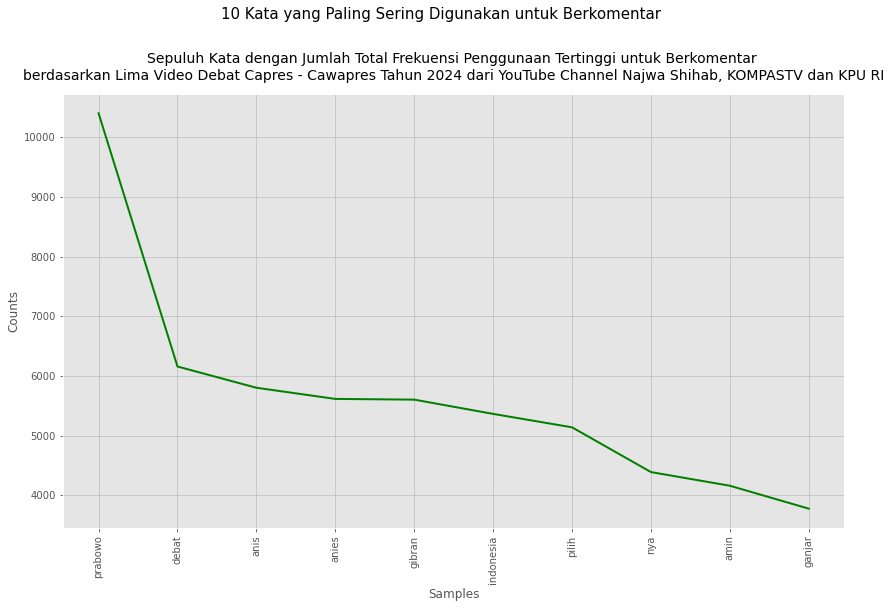

In [130]:
"""
Melihat total nilai dari kata per kata yang sering muncul atau kata yang sangat dominan
yang diambil dari variabel fqdist_sentiment yang ditampilkan menggunakan grafik garis (line plot)
dan hanya menampilkan sebanyak 50 kata saja dari 150 kata yang ada di variabel fqdist_sentiment
"""
plt.figure(figsize=(14, 8))

plt.suptitle("10 Kata yang Paling Sering Digunakan untuk Berkomentar", fontsize=15, y=1.03)
plt.title("Sepuluh Kata dengan Jumlah Total Frekuensi Penggunaan Tertinggi untuk Berkomentar \n"
          "berdasarkan Lima Video Debat Capres - Cawapres Tahun 2024 dari YouTube Channel Najwa Shihab, KOMPASTV dan KPU RI",
          fontsize=14, pad=14)
count_of_word_by_comment_text.plot(10, color="green", cumulative=False)
plt.show()

### 3.2. Data Comparison with Bar Chart

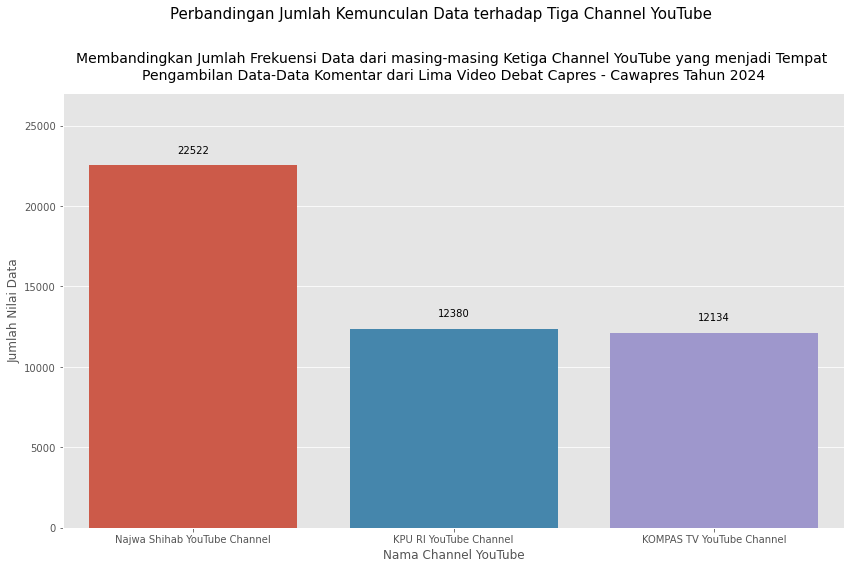

In [131]:
"""
Menampilkan perbandingan kemunculan nilai data dari ketiga nama channel YouTube yang digunakan
di dalam penelitian kali ini untuk menjadi tempat pengambilan data-data komentar yaitu
channel Najwa Shihab, KOMPASTV dan KPU RI
"""
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="channel_name", data=youtube_comments_df,
                   order=youtube_comments_df["channel_name"].value_counts(ascending=False).index)

# Bertujuan untuk mengeluarkan jumlah frekuensi data pada masing-masing nilai data yang terdapat pada kolom "channel_name"
for i in ax.containers:
    ax.bar_label(i, padding=10, fmt="%.0f", fontsize=10)
    ax.margins(y=0.2)
    
plt.suptitle("Perbandingan Jumlah Kemunculan Data terhadap Tiga Channel YouTube", fontsize=15, y=1.03)
plt.title("Membandingkan Jumlah Frekuensi Data dari masing-masing Ketiga Channel YouTube yang menjadi Tempat \n"
          "Pengambilan Data-Data Komentar dari Lima Video Debat Capres - Cawapres Tahun 2024", fontsize=14, pad=14)
plt.xlabel("Nama Channel YouTube", fontsize=12)
plt.ylabel("Jumlah Nilai Data", fontsize=12)
#plt.savefig("Grafik Visualisasi/Perbandingan Ketiga Channel YouTube yang memiliki Jumlah Frekuensi Terbanyak.png")
plt.show()

Berdasakan grafik batang diatas dapat diketahui jika sebanyak 22.522 data komentar didapatkan dari channel YouTube Najwa Shihab sehingga informasi ini mengartikan jika penelitian ini lebih banyak menggunakan data-data komentar dari channel YouTube Najwa Shihab dibandingkan data-data komentar dari channel KPU RI maupun KOMPASTV. Tetapi walaupun begitu channel KPU RI memiliki jumlah komentar sebanyak 12.380 data sehingga membuat channel KPU RI memiliki data komentar terbanyak kedua di dalam penelitian ini. Sementara channel KOMPASTV memiliki jumlah komentar sebanyak 12.134.

Hal tersebut juga disebabkan karena keterbatasan dalam mengambil jumlah komentar menggunakan YouTube Data API v3 (salah satu service yang disediakan oleh Google Cloud Platform Console untuk dapat mengambil data-data publik dari media sosial YouTube). Walaupun penelitian ini sudah melewati jumlah limit dalam pengambilan data (karena secara default, layanan YouTube Data API v3 hanya dapat mengambil data sebanyak 100 komentar saja) menggunakan looping, tetapi ternyata tidak dapat mengambil seluruh komentar dari masing-masing video debat yang ditayangkan oleh ketiga channel tersebut. Selain itu penyebab kedua adalah karena memang jumlah komentar dari beberapa video debat yang ditayangkan dan di-upload oleh channel YouTube KPU RI dan KOMPASTV sangat sedikit.

Sebagai contoh pada video debat keempat yang ditayangkan oleh channel KOMPASTV, jumlah total komentar yang ada di dalam video tersebut adalah 719 komentar sedangkan data komentar yang berhasil diambil untuk penelitian ini adalah 300 data komentar. Sementara itu pada video debat keempat yang ditayangkan oleh channel Najwa Shihab, jumlah total komentar yang terdapat di dalam video debat tersebut memiliki jumlah sebanyak 7.869 komentar dan  data komentar yang berhasil diambil untuk penelitian analisa sentimen ini adalah 4.000 komentar. Di samping itu, di dalam video debat keempat dari channel KPU RI, jumlah komentar yang terdapat di dalam video tersebut adalah 1.851 komentar dan jumlah data komentar yang berhasil diambil untuk penelitian ini adalah sebanyak 1.040 data komentar.

Perbandingan jumlah komentar yang terdapat di dalam beberapa video debat menyebabkan jumlah data yang berhasil terambil untuk penelitian ini menjadi tidak seimbang antara satu video debat dari satu channel dengan video debat lainnya yang ditayangkan oleh channel lainnya.

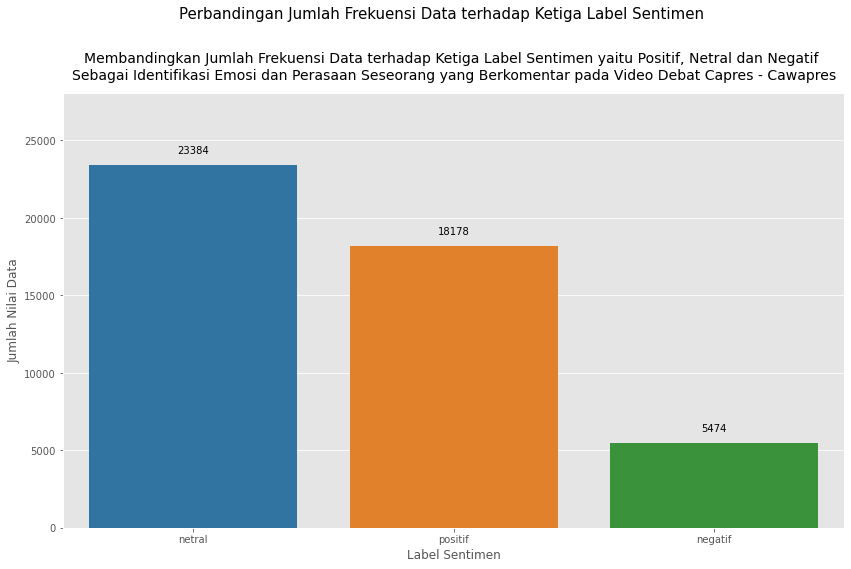

In [132]:
"""
Menampilkan perbandingan antara kemunculan nilai data dari masing-masing label
sentimen yang digunakan di dalam penelitian kali ini yaitu label sentimen positif, netral dan negatif
"""
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="sentiment_label", data=youtube_comments_df, palette="tab10",
                   order=youtube_comments_df["sentiment_label"].value_counts(ascending=False).index)

# Bertujuan untuk mengeluarkan jumlah frekuensi data pada masing-masing nilai data yang terdapat pada kolom "sentiment_label"
for i in ax.containers:
    ax.bar_label(i, padding=10, fmt="%.0f", fontsize=10)
    ax.margins(y=0.2)
    
plt.suptitle("Perbandingan Jumlah Frekuensi Data terhadap Ketiga Label Sentimen", fontsize=15, y=1.03)
plt.title("Membandingkan Jumlah Frekuensi Data terhadap Ketiga Label Sentimen yaitu Positif, Netral dan Negatif \n"
          "Sebagai Identifikasi Emosi dan Perasaan Seseorang yang Berkomentar pada Video Debat Capres - Cawapres",
          fontsize=14, pad=14)
plt.xlabel("Label Sentimen", fontsize=12)
plt.ylabel("Jumlah Nilai Data", fontsize=12)
#plt.savefig("Grafik Visualisasi/Perbandingan Tiga Jenis Label Sentimen berdasarkan Jumlah Frekuensi.png")
plt.show()

Berdasarkan grafik batang diatas kita dapat mengetahui insight terkait perbandingan jumlah label sentimen yang akan digunakan dalam pengklasifikasian menggunakan Algoritma Machine Learning di mana label netral memiliki jumlah frekuensi terbanyak dibandingkan label positif maupun label negatif. Label sentimen ini dibuat berdasarkan nilai pada kolom "polarity". Perlu diketahui dan diingat kembali label netral dibuat berdasarkan skor polarity bernilai 0, label negatif berdasarkan skor polarity dengan nilai -1 sedangkan label positif dari skor polarity 1. Sehingga dengan nilai-nilai polaritas tersebut dapat menunjukkan dan mengidentifikasikan emosi seseorang berdasarkan susunan teks/kalimat yang dibuat oleh orang tersebut, apakah orang tersebut marah/kecewa saat menulis komentar sehingga akan memiliki sentimen negatif, apakah orang tersebut bahagia dan senang saat menulis komentar tersebut sehingga memiliki sentimen positif, atau apakah orang yang membuat kalimat tersebut tidak memiliki perasaan kecewa/senang sehingga sentimen yang dihasilkan adalah netral.

Label netral memiliki jumlah nilai paling banyak dibandingkan 2 label lainnya yakni berjumlah 23.384 sehingga hal ini juga mengartikan bahwasanya sebanyak 23.384 komentar yang dibuat oleh para penonton video debat capres - cawapres tahun 2024 yang telah ditayangkan oleh channel YouTube Najwa Shihab, KOMPASTV dan KPU RI memiliki susunan kalimat yang menunjukkan netralitas setelah komentar-komentar tersebut dibersihkan menggunakan teknik NLP (Natural Language Processing). Sementara itu sebanyak 5.474 komentar yang diambil dari ketiga channel dan juga telah diproses teknik NLP seperti removal punctuations, case folding, stemming, dll., memiliki sentimen negatif. Sedangkan 18.178 komentar memiliki label sentimen positif.

Maka dari itu agar dapat lebih mudah dalam mengetahui kata-kata seperti apa yang paling sering digunakan berdasarkan label sentimen netral, positif dan negatif, penelitian ini akan menunjukkannya dalam bentuk grafik wordcloud. Wordcloud merupakan sebuah grafik yang berfungsi untuk menunjukkan tingkat frekuensi dari kata-kata yang paling sering digunakan. Semakin besar sebuah kata di dalam grafik wordcloud maka menunjukkan kata tersebut adalah kata yang paling sering digunakan dan sebaliknya jika suatu kata ditunjukkan dengan visual yang kecil di dalam grafik wordcloud maka kata tersebut sangat jarang digunakan di dalam kalimat. Namun sebelum menunjukkan kata-kata yang paling sering digunakan di dalam ketiga label sentimen yaitu netral, positif dan negatif, saya akan menunjukkan terlebih dahulu kata-kata yang paling sering digunakan berdasarkan teks kalimat komentar yang sudah di proses dengan teknik NLP.

### 3.3. Display Word Frequency using WordCloud Visualization

#### 3.3.1. The Most Frequently Used Words Based on Comments that have been Cleaned Using NLP (Natural Language Processing) Techniques

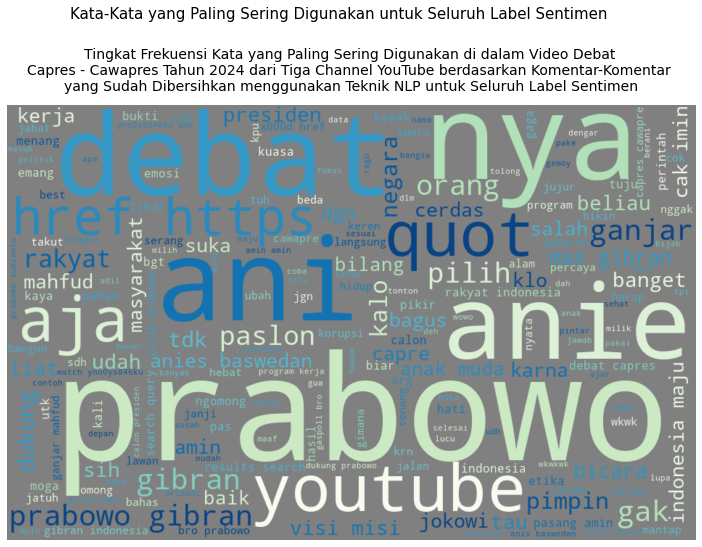

In [133]:
"""
Menampilkan setiap kata yang paling sering digunakan dalam membuat kalimat komentar
berdasarkan kalimat-kalimat komentar yang sudah dibersihkan dengan Natural Language Processing
seperti stemming, stopwords removal, removal punctuations, case folding, dan tokenization
"""

plt.figure(figsize=(14, 8))

all_comments_words = " ".join(word for word in youtube_comments_df["clean_text_comment"])
wordcloud_visualization = WordCloud(colormap="GnBu", width=950, height=600,
                                    mode="RGBA", background_color="gray").generate(all_comments_words)
plt.suptitle("Kata-Kata yang Paling Sering Digunakan untuk Seluruh Label Sentimen", fontsize=15, y=1.05)
plt.title("Tingkat Frekuensi Kata yang Paling Sering Digunakan di dalam Video Debat \n"
          "Capres - Cawapres Tahun 2024 dari Tiga Channel YouTube berdasarkan Komentar-Komentar \n"
          "yang Sudah Dibersihkan menggunakan Teknik NLP untuk Seluruh Label Sentimen",
          fontsize=14, pad=14)
plt.imshow(wordcloud_visualization, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Grafik Visualisasi/Frekuensi Kata yang Paling Sering Digunakan untuk Seluruh Label Sentimen dengan WordCloud.png")
plt.show()

Berdasarkan grafik wordcloud diatas kita dapat mengetahui jika kata "prabowo", "youtube", "debat", "nya", "anies" "anis" memiliki bentuk visualisasi kata yang paling menonjol dibandingkan kata-kata lainnya. Hal tersebut dikarenakan kata "praboowo", "debat", "anis", "anies" memiliki jumlah total frekuensi penggunaan paling tinggi atas kata-kata tersebut. Sebagai contoh saja kata "prabowo" telah digunakan sebanyak 10.402 kali di dalam kolom "clean_text_comment" yang merupakan kalimat-kalimat komentar yang telah dibersihkan sekaligus disederhanakan menjadi bentuk kata dasarnya. Sementara itu kata "debat" di dalam kolom "clean_text_comment" telah digunakan sebanyak 6.159 kali. Maka dari itu sifat dari kedua kata tersebut memiliki bentuk ukuran yang sangat besar dibandingkan kata-kata lainnya seperti "pasang", "amin", "jokowi", "dukung", "menang", dll., karena kata-kata yang memiliki bentuk ukuran yang tidak besar menunjukkan bahwa kata tersebut jarang digunakan oleh para channel akun YouTube yang menonton video debat serta menuliskan kalimat komentar di dalam video debat tersebut.

Namun grafik WordCloud diatas masih mencakup semua label sentimen (baik sentimen netral, positif dan negatif) sehingga kita akan kesulitan dalam mengidentifikasikan kata manakah yang paling sering digunakan di dalam label sentimen netral, positif ataupun positif. Maka dari itu untuk memudahkan dalam mengidentifikasikannya, saya di dalam penelitian ini akan membuat tiga buah grafik visualisasi WordCloud yang mencakup visualisasi kata-kata untuk ketiga label sentimen yaitu label sentimen netral, label sentimen positif dan label sentimen negatif.

#### 3.3.2. The Most Frequently Used Words in Neutral Sentiment Labels from Comment that have been Cleaned Using NLP (Natural Language Processing) Techniques

Sebelum membuat grafik visualisasi WordCloud untuk kata-kata yang paling sering digunakan di dalam label sentimen netral, saya akan terlebih dahulu membuat variabel DataFrame khusus yang akan menyimpan seluruh data-data komentar yang memiliki label netral. Hal ini akan memudahkan dalam mengidentifikasi kata per kata dari kalimat komentar yang memiliki label sentimen netral.

In [134]:
"""
Melakukan proses filter data dari variabel DataFrame "youtube_comments_df" yang memiliki label sentimen netral
dan hasil filter data disimpan di dalam variabel DataFrame baru yaitu "neutral_comment_text"
serta menampilkan 7 data terbawah dari variabel DataFrame yang khusus menyimpan data-data komentar dengan label sentimen netral
"""

neutral_comment_text = youtube_comments_df[youtube_comments_df["sentiment_label"] == "netral"]
neutral_comment_text.tail(7)

video_id                channel_id                  channel_name  \
48229  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48231  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48232  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48233  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48234  Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48237  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
48238  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   

                       comment_id                         author  \
48229  UgxYVz0KAMCZo-TzDVV4AaABAg  @annisanoviyantirohmaniar7203   
48231  Ugx27SQkB0QKWZiYTdl4AaABAg                  @parjooka4282   
48232  Ugw7G_RI_lvzFVM8p2d4AaABAg                     @indraJr45   
48233  UgyCvYRSznTa39CjLoB4AaABAg       @ralfinseptyanugroho6478   
48234  UgzZvZaLhvjf9LSH34x4AaABAg                  @bangnizz2474   
48237  UgwPXrNn6dyKRkgjDzd4AaABAg       @ralfinseptyanugroho6478   
48238  Ugx4nJkrQUve_UheMdp4AaABAg                   @opanboc5038   

                                      dirty_text_comment  \
48229                                 Semangat pa ganjar   
48231  Pak prabowo seakan akan jubir jokowi dan gibra...   
48232  Pak ganjar dan pak anies briliant, saya harap ...   
48233                            Jumlah motor nambah bos   
48234  Untuk Mememilih Presiden terbaik Maka dari dul...   
48237                                Si ambil contekan 😂   
48238  Gak ada Keraguan Untuk Pasangan AMIN....Seanda...   

                                      clean_text_comment  like_count  \
48229                                    semangat ganjar           0   
48231            prabowo akan jubir jokowi gibran capres           0   
48232  ganjar anies briliant harap head head putar ba...           0   
48233                                   motor nambah bos           0   
48234                            pilih presiden baik kpu           0   
48237                                       ambil contek           0   
48238  gak ragu pasang amin anda milu baya bayar ubah...           0   

       total_reply      published_date        updated_date  subjectivity  \
48229            0 2023-12-13 01:29:20 2023-12-13 01:29:20           0.0   
48231            0 2023-12-13 01:30:36 2023-12-13 01:30:36           0.0   
48232            0 2023-12-13 01:30:44 2023-12-13 01:30:44           0.0   
48233            0 2023-12-13 01:31:01 2023-12-13 01:31:01           0.0   
48234            0 2024-01-07 19:08:29 2024-01-07 19:08:29           0.0   
48237            0 2023-12-13 01:31:45 2023-12-13 01:31:45           0.0   
48238            0 2024-02-04 18:22:22 2024-02-04 18:22:22           0.0   

       polarity sentiment_label  
48229       0.0          netral  
48231       0.0          netral  
48232       0.0          netral  
48233       0.0          netral  
48234       0.0          netral  
48237       0.0          netral  
48238       0.0          netral

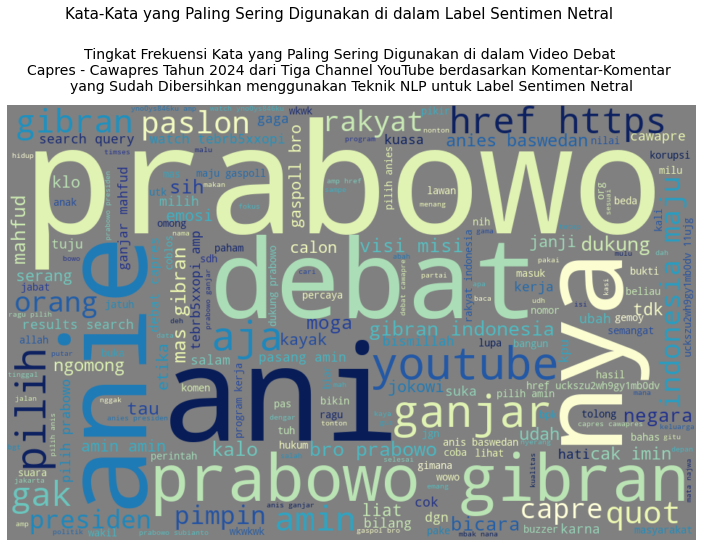

In [135]:
"""
Menampilkan setiap kata yang paling sering digunakan dalam membuat kalimat komentar di dalam video debat capres - cawapres
berdasarkan komentar-komentar yang memiliki label sentimen netral dari variabel DataFrame "neutral_comment_text"
"""

plt.figure(figsize=(14, 8))

neutral_comments_words = " ".join(word for word in neutral_comment_text["clean_text_comment"])
wordcloud_visulization = WordCloud(colormap="YlGnBu", width=950, height=600, mode="RGBA",
                                   background_color="gray").generate(neutral_comments_words)
plt.suptitle("Kata-Kata yang Paling Sering Digunakan di dalam Label Sentimen Netral", fontsize=15, y=1.05)
plt.title("Tingkat Frekuensi Kata yang Paling Sering Digunakan di dalam Video Debat \n"
          "Capres - Cawapres Tahun 2024 dari Tiga Channel YouTube berdasarkan Komentar-Komentar \n"
          "yang Sudah Dibersihkan menggunakan Teknik NLP untuk Label Sentimen Netral", fontsize=14, pad=14)
plt.imshow(wordcloud_visulization, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Grafik Visualisasi/Frekuensi Kata yang Paling Sering Digunakan berdasarkan Label Netral dengan WordCloud.png")
plt.show()

#### 3.3.3. The Most Frequently Used Words in Positive Sentiment Labels from Comment that have been Cleaned Using NLP (Natural Language Processing) Techniques

In [136]:
"""
Melakukan proses filter data dari variabel DataFrame "youtube_comments_df" yang memiliki label sentimen positif
dan hasil filter data disimpan di dalam variabel DataFrame baru yaitu "positive_comment_text"
serta menampilkan 13 data teratas dari variabel DataFrame "positive_comment_text"
"""

positive_comment_text = youtube_comments_df[youtube_comments_df["sentiment_label"] == "positif"]
positive_comment_text.head(13)

video_id                channel_id                  channel_name  \
0   Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
3   tEbRB5xxOPI  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
4   KJdt-HBBGIo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   
5   gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
6   gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
7   JFl2fOTBNIE  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
8   gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
9   Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
10  p-vbZkT3Yck  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
11  Sbjsg3AFx00  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
13  gUz_MgdwKg0  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
15  p-vbZkT3Yck  UCo8h2TY_uBkAVUIc14m_KCA  Najwa Shihab YouTube Channel   
18  8J66JxvmEzo  UCVdSz86o9q2cQKvAQ5QhOYg        KPU RI YouTube Channel   

                    comment_id                    author  \
0   Ugx6mhUfDOUhd65fWyh4AaABAg          @udinlamidun9716   
3   UgzaWyuIp8PPLQrUOct4AaABAg         @abizardfahry4591   
4   Ugy7bfVbuDxBgae9eVp4AaABAg          @nabilbudiman271   
5   UgzKC1PcDJZk7TvQ_Qh4AaABAg           @UmmuAzizah2010   
6   Ugxtzzc3zKJ8nY3Sg7F4AaABAg            @nursusilo7298   
7   UgwB34PptWoq1w3z7xN4AaABAg  @lilissuryanilimbong7685   
8   Ugypp7MrvLOhoz9GGUV4AaABAg           @abisopiyan8628   
9   Ugw1wHlLE405w38TGhx4AaABAg         @ameliaachtar1904   
10  UgyJX6diRTVoG-ulwqB4AaABAg            @luluk_layalie   
11  Ugwru57KZMbtoy1Y-Wp4AaABAg  @MuhammadDermawanSusanto   
13  UgyzdGCruWPoVqZjMul4AaABAg       @chickennoodles1740   
15  UgzO_HcRVJSQ7ZrHCel4AaABAg         @ichadonnelly4634   
18  Ugz8GZ3Lfw7X9kYnqSV4AaABAg        @anisluthfiani9056   

                                   dirty_text_comment  \
0   Siapa yg setuju 3 capres di undang bertiga di ...   
3   Siapa yang disini setuju 3 capres dan cawapres...   
4   <a href="https://www.youtube.com/watch?v=KJdt-...   
5   Maa syaa Allaah Pak Anies ❤❤❤❤ <br>Terima kasi...   
6   Tak terbantahkan Pak Anis cards yg paling siap...   
7   Selaku Ibu Rumah Tangga saya tahu apa yg dibut...   
8   Saya dan keluarga berkat debat pertama ini ras...   
9   Mudah2an pemilunya jujur, jadi sesuai pilihan ...   
10  Jujur, gw terpukau banget sama Mas Gibran. Ben...   
11  Pak Anies sadar bahwa Pak Prabowo secara teori...   
13  🇲🇨 <a href="https://www.youtube.com/watch?v=gU...   
15  Terbukti yang muda belum tentu tidak berkualit...   
18  Abah terimakasih sudah mewarnai demokrasi ini ...   

                                   clean_text_comment  like_count  \
0   tuju capres undang tiga mata najwa debat nyata...        3970   
3   tuju capres cawapres undang tiga mata najwa de...        2531   
4   href https www youtube com watch kjdt hbbgio a...        1590   
5   maa syaa allaah anies terima kasih cerah sbg r...        1542   
6   bantah anis cards logis sistematis educativ ko...        1501   
7   rumah tangga butuh anak makan gratis solusi ma...        1486   
8   keluarga berkat debat pilih anies baswedan pre...        1452   
9             mudah2an milu jujur sesuai pilih rakyat        1396   
10  jujur pukau banget mas gibran semangat anak mu...        1253   
11  anies sadar prabowo teori debat sgt kuasa drpd...        1203   
13  href https www youtube com watch guz mgdwkg0 a...        1130   
15  bukti muda kualitas cetek ilmu muda ilmu wawas...         988   
18  abah terimakasih warna demokrasi cerdas suara ...         885   

    total_reply      published_date        updated_date  subjectivity  \
0           332 2024-01-07 17:03:53 2024-01-09 23:18:49      0.300000   
3            91 2024-01-22 00:17:18 2024-01-22 00:17:18      0.300000   
4           122 2024-01-07 15:37:05 2024-01-07 15:37:05      0.474444   
5            23 2023-12-12 16:27:52 2023-12-12 16:27:52  

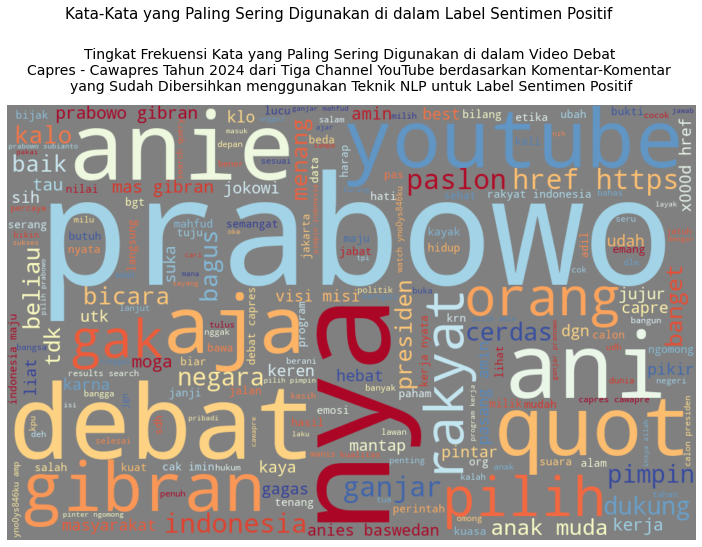

In [137]:
"""
Menampilkan setiap kata yang paling sering digunakan dalam membuat kalimat komentar di dalam video debat capres - cawapres
berdasarkan komentar-komentar yang memiliki label sentimen positif dari variabel DataFrame "positive_comment_text"
"""

plt.figure(figsize=(14, 8))

positive_comments_words = " ".join(word for word in positive_comment_text["clean_text_comment"])
wordcloud_visulization = WordCloud(colormap="RdYlBu", width=950, height=600, mode="RGBA",
                                   background_color="gray").generate(positive_comments_words)
plt.suptitle("Kata-Kata yang Paling Sering Digunakan di dalam Label Sentimen Positif", fontsize=15, y=1.05)
plt.title("Tingkat Frekuensi Kata yang Paling Sering Digunakan di dalam Video Debat \n"
          "Capres - Cawapres Tahun 2024 dari Tiga Channel YouTube berdasarkan Komentar-Komentar \n"
          "yang Sudah Dibersihkan menggunakan Teknik NLP untuk Label Sentimen Positif", fontsize=14, pad=14)
plt.imshow(wordcloud_visulization, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Grafik Visualisasi/Frekuensi Kata yang Paling Sering Digunakan berdasarkan Label Positif dengan WordCloud.png")
plt.show()